In [1]:
import torch
from utils.dataloader import get_dataloaders
from utils.train import train_model, test_model
from utils.metrics import (
    plot_history,
    plot_confusion_matrix,
    save_results_csv,
    plot_model_comparison,
)

from models.single_models import get_single_model
from models.hybrid_models import get_hybrid_model, get_multi_hybrid_model

E:\Document\anaconda\envs\lung_gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:",device)

Using device: cuda


In [3]:
DATA_DIR = "lung_ct_split"

preprocess_cfg = {
    "windowing": False,
    "clahe": True,
    "hist_eq": False,
    "gaussian": True,
    "median": False,
    "sharpen_flag": False,
    "norm_type": "minmax"
}

train_loader, val_loader, test_loader, class_names = get_dataloaders(
    data_dir = DATA_DIR,
    batch_size = 16,
    preprocess_config= preprocess_cfg,
)

print("Classes: ",class_names)

Classes:  ['Bengin cases', 'Malignant cases', 'Normal cases']


In [4]:
from PIL import Image
import os

bad_files = []

for root, _, files in os.walk(DATA_DIR):
    for f in files:
        path = os.path.join(root, f)
        try:
            Image.open(path).verify()
        except:
            bad_files.append(path)

print("Corrupted images:", len(bad_files))
bad_files[:10]


Corrupted images: 0


[]

In [5]:
EPOCHS = 20

single_model_names = [
    # "resnet50",
    # "vgg16",
    "densenet",
    "b4","contextiny",
    "efficientnet",
    "inception",
    "vit",
]

# "resnet50": "resnet50",
#     "vgg16": "vgg16",
#     "efficientnet": "efficientnet_b0",
#     "inception": "inception_v3",
#     "vit": "vit_base_patch16_224",
#     "densenet":"densenet121",
#     "b4":"efficientnet_b4",
#     "convextiny":"convnext_tiny"

results = {}
histories = {}


===== Training DENSENET =====

Epoch 1/20
Train Loss: 0.7474 | Train Acc: 0.6701
Val   Loss: 0.4886 | Val   Acc: 0.8659

Epoch 2/20
Train Loss: 0.3841 | Train Acc: 0.8566
Val   Loss: 0.3171 | Val   Acc: 0.8902

Epoch 3/20
Train Loss: 0.3129 | Train Acc: 0.8905
Val   Loss: 0.2784 | Val   Acc: 0.9085

Epoch 4/20
Train Loss: 0.2403 | Train Acc: 0.9153
Val   Loss: 0.2563 | Val   Acc: 0.9146

Epoch 5/20
Train Loss: 0.1774 | Train Acc: 0.9544
Val   Loss: 0.2589 | Val   Acc: 0.8963

Epoch 6/20
Train Loss: 0.1546 | Train Acc: 0.9478
Val   Loss: 0.1881 | Val   Acc: 0.9268

Epoch 7/20
Train Loss: 0.1074 | Train Acc: 0.9739
Val   Loss: 0.2080 | Val   Acc: 0.9146

Epoch 8/20
Train Loss: 0.0736 | Train Acc: 0.9831
Val   Loss: 0.2224 | Val   Acc: 0.9268

Epoch 9/20
Train Loss: 0.0761 | Train Acc: 0.9804
Val   Loss: 0.1479 | Val   Acc: 0.9390

Epoch 10/20
Train Loss: 0.0682 | Train Acc: 0.9870
Val   Loss: 0.1524 | Val   Acc: 0.9268

Epoch 11/20
Train Loss: 0.0540 | Train Acc: 0.9883
Val   Loss: 0.20

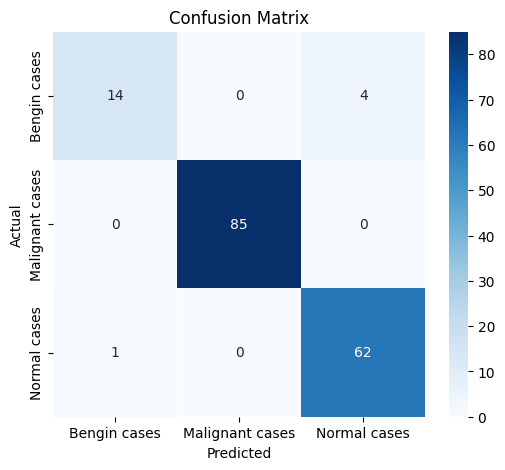


===== Training B4 =====


E:\Document\anaconda\envs\lung_gpu\lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\himan\.cache\huggingface\hub\models--timm--efficientnet_b4.ra2_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)



Epoch 1/20
Train Loss: 0.7402 | Train Acc: 0.6780
Val   Loss: 0.6587 | Val   Acc: 0.7927

Epoch 2/20
Train Loss: 0.3786 | Train Acc: 0.8527
Val   Loss: 0.3065 | Val   Acc: 0.9024

Epoch 3/20
Train Loss: 0.3073 | Train Acc: 0.8840
Val   Loss: 0.2589 | Val   Acc: 0.9146

Epoch 4/20
Train Loss: 0.2661 | Train Acc: 0.8957
Val   Loss: 0.2268 | Val   Acc: 0.9329

Epoch 5/20
Train Loss: 0.2151 | Train Acc: 0.9218
Val   Loss: 0.2016 | Val   Acc: 0.9329

Epoch 6/20
Train Loss: 0.1965 | Train Acc: 0.9296
Val   Loss: 0.2130 | Val   Acc: 0.9329

Epoch 7/20
Train Loss: 0.1557 | Train Acc: 0.9413
Val   Loss: 0.1874 | Val   Acc: 0.9329

Epoch 8/20
Train Loss: 0.1296 | Train Acc: 0.9622
Val   Loss: 0.2012 | Val   Acc: 0.9207

Epoch 9/20
Train Loss: 0.1150 | Train Acc: 0.9622
Val   Loss: 0.1659 | Val   Acc: 0.9390

Epoch 10/20
Train Loss: 0.1194 | Train Acc: 0.9596
Val   Loss: 0.1473 | Val   Acc: 0.9512

Epoch 11/20
Train Loss: 0.0681 | Train Acc: 0.9804
Val   Loss: 0.1572 | Val   Acc: 0.9268

Epoch 1

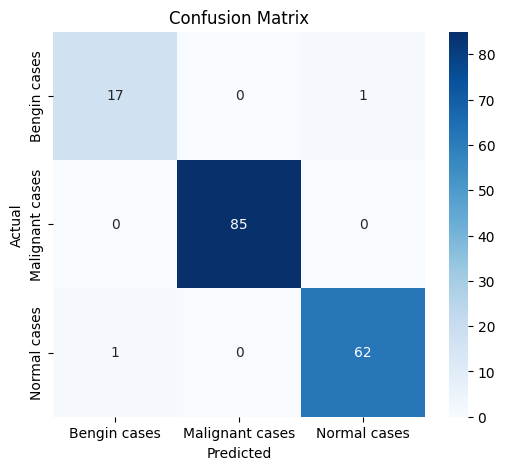


===== Training CONTEXTINY =====


ValueError: Model 'contextiny' not supported. Choose from ['resnet50', 'vgg16', 'efficientnet', 'inception', 'vit', 'densenet', 'b4', 'convextiny']

In [6]:
for name in single_model_names:
    print(f"\n===== Training {name.upper()} =====")

    model = get_single_model(name, num_classes=len(class_names)).to(device)

    model, history = train_model(
        model,
        train_loader,
        val_loader,
        device,
        epochs=EPOCHS,
    )

    test_acc, report, cm = test_model(
        model,
        test_loader,
        device,
        class_names,
    )

    results[name] = test_acc
    histories[name] = history

    print(f"\n{name} Test Accuracy: {test_acc:.4f}")
    print(report)

    plot_confusion_matrix(cm, class_names)


===== Training RESNET50_VIT =====

Epoch 1/15
Train Loss: 0.6121 | Train Acc: 0.7497
Val   Loss: 5.7030 | Val   Acc: 0.5122

Epoch 2/15
Train Loss: 0.4008 | Train Acc: 0.8488
Val   Loss: 1.5593 | Val   Acc: 0.7683

Epoch 3/15
Train Loss: 0.2685 | Train Acc: 0.9022
Val   Loss: 0.8381 | Val   Acc: 0.6585

Epoch 4/15
Train Loss: 0.2424 | Train Acc: 0.9100
Val   Loss: 1.7781 | Val   Acc: 0.5732

Epoch 5/15
Train Loss: 0.2893 | Train Acc: 0.9035
Val   Loss: 0.2704 | Val   Acc: 0.8902

Epoch 6/15
Train Loss: 0.2071 | Train Acc: 0.9283
Val   Loss: 0.4446 | Val   Acc: 0.8171

Epoch 7/15
Train Loss: 0.1919 | Train Acc: 0.9296
Val   Loss: 0.4475 | Val   Acc: 0.7561

Epoch 8/15
Train Loss: 0.1672 | Train Acc: 0.9478
Val   Loss: 0.3244 | Val   Acc: 0.8598

Epoch 9/15
Train Loss: 0.1638 | Train Acc: 0.9452
Val   Loss: 0.5874 | Val   Acc: 0.7622

Epoch 10/15
Train Loss: 0.1415 | Train Acc: 0.9609
Val   Loss: 0.1889 | Val   Acc: 0.9329

Epoch 11/15
Train Loss: 0.1412 | Train Acc: 0.9478
Val   Loss: 

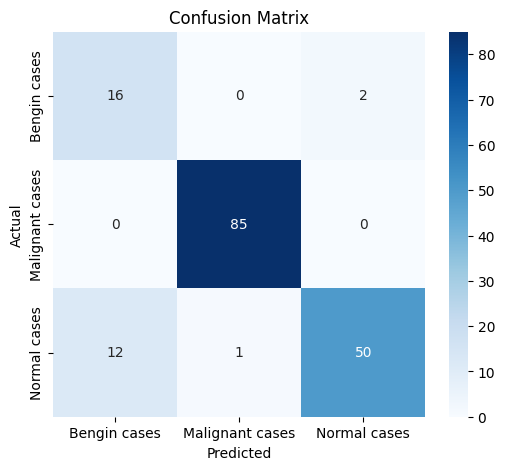

In [24]:
hybrid_configs = {
    "resnet50_vit": lambda: get_hybrid_model("resnet50"),
    # "efficientnet_vit": lambda: get_hybrid_model("efficientnet_b0"),
    # "multi_cnn_vit": lambda: get_multi_hybrid_model(
    #     cnn_list=("resnet50", "efficientnet_b0", "inception_v3")
    # ),
}

for name, builder in hybrid_configs.items():
    print(f"\n===== Training {name.upper()} =====")

    model = builder().to(device)

    model, history = train_model(
        model,
        train_loader,
        val_loader,
        device,
        epochs=EPOCHS,
    )

    test_acc, report, cm = test_model(
        model,
        test_loader,
        device,
        class_names,
    )

    results[name] = test_acc
    histories[name] = history

    print(f"\n{name} Test Accuracy: {test_acc:.4f}")
    print(report)

    plot_confusion_matrix(cm, class_names)

✅ Results saved → ./results/reports/results.csv


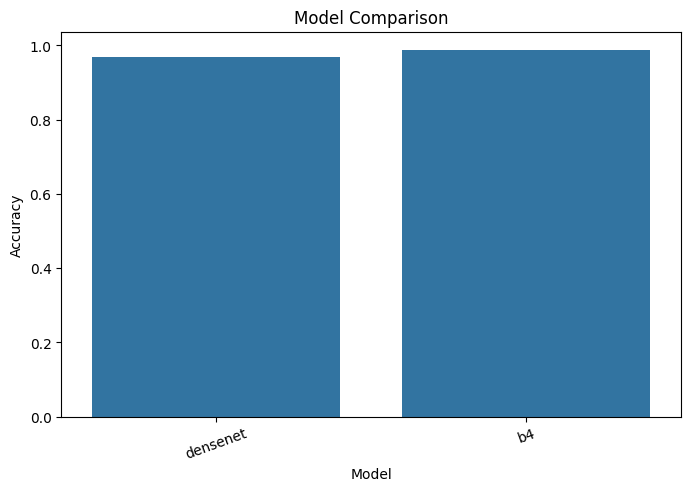

In [7]:
save_results_csv(results, "./results/reports/results.csv",preprocess_cfg,EPOCHS)
plot_model_comparison(results, "./results/plots/comparison.png")

Best model: b4


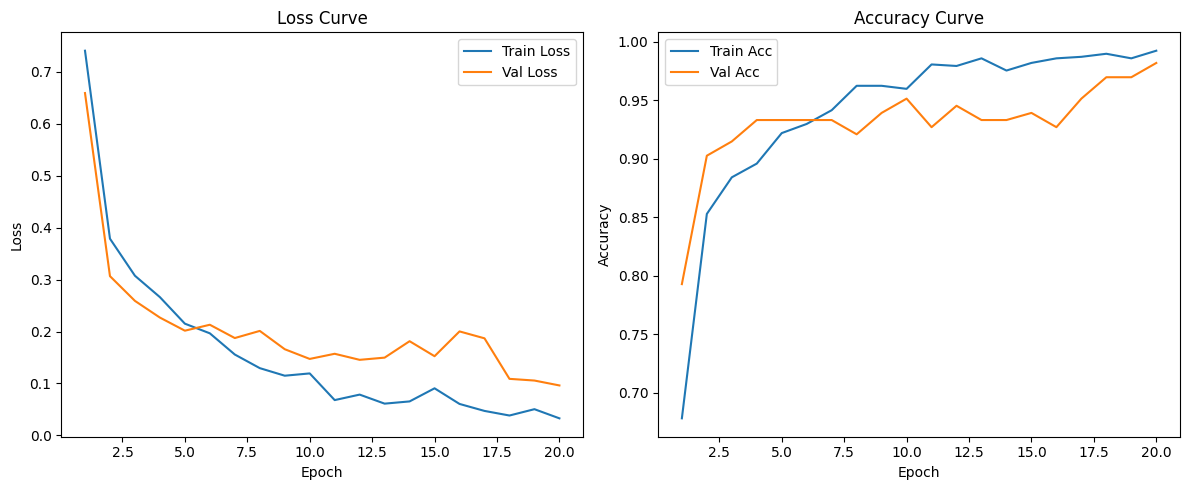

In [8]:
best_model_name = max(results, key=results.get)
print("Best model:", best_model_name)

plot_history(
    histories[best_model_name],
    f"./results/plots/{best_model_name}_history.png",
)